## רקע על הדאטה:
עוד במהלך חיינו היינו ועודנו עדים להמצאות ושיפורם טכנולוגיים ששינו באופן טוטאלי את אורח החיים המודרני בכל האספקטים.
אחת מההשפעות הבולטות ביותר היא בתחום החברתי. בעידן הרשתות החברתיות והפלאפונים החכמים כמעט ואין צורך להיפגש עם אנשים באופן פיזי בכדי לתקשר ולהעביר מידע.
שינויים אלה הביאו איתם קשיים ותופעות חברתיות חדשות כאשר אחת מהן היא חרדה חברתית.
באופן אינטואיטיבי כל חברי הקבוצה שיערו כי יש השפעה ישירה בין השימוש במדיה ופלאפונים חכמים לבין חרדה חברתית.
בעזרת קובץ המידע הנ"ל שעוסק בחרדה חברתית שמכיל בתוכו מידע על 93 אנשים, 69- סטודנטים ו24 – לא סטודנטים. (אנחנו בחרנו להתמקד בסטודנטים)
החלטנו לבחון את הגורמים לחרדה חברתית ולנסות ולמצוא אילו אוכלוסיות נמצאות בסיכון יותר גבוה ללקות בחרדה כזו
.
##### טופס הסקר מורכב ממידע אישי בסיסי כמו טווח גילאים, מין ומצב משפחתי ועוד 7 שאלות שבוחנות את רמת החרדה של הנשאלים 
##### :כאשר המדד מתחלק בין רמות חרדה
> גבוה (ציון: מעל 24)

> בינונית (ציון: 18-23) 

> נמוכה (ציון: 17 ומטה)
#### :השאלות המרכיבות את השאלון הן

> Q1: How many hours per day do you spend on social media?

> Q2: How do you feel being the center of attention

> Q3: Working while being observed

> Q4: Talking face to face with someone you don't know very well

> Q5: Expressing disagreement or disapproval to someone you don't know very well

> Q6: Are you extremely conscious of your actions when in social settings because you fear they might offend someone or you could be rejected?

> Q7: Do you feel anxious or panicky before social situations?

##### מצאנו כי אכן ישנה קבוצה מתוך קבוצת הסטודנטים הנשאלת שחשופה יותר להפרעת חרדה חברתית.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = 'https://raw.githubusercontent.com/yrhein01/Fina-project/main/Social_Anxiety_Survey_Master.csv'
anxiety_data = pd.read_csv(url)
anxiety_data.head()

,Timestamp,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,12/12/2019 2:06,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1
1,12/12/2019 21:41,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4
2,12/12/2019 21:42,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4
3,12/12/2019 21:43,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1
4,12/12/2019 21:43,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4


## Fix the data

In [3]:
anxiety_data = anxiety_data.drop('Timestamp',axis = 1)
anxiety_data['Total Anxiety'] = anxiety_data[['Q2','Q3','Q4','Q5','Q6','Q7']].sum(axis=1)

#### חלוקה לרמות חרדה לפי סך הניקוד של השאלון

In [4]:
conditions = [
    (anxiety_data['Total Anxiety'] <= 17),
    (anxiety_data['Total Anxiety'] >= 18) & (anxiety_data['Total Anxiety'] <= 23),
    (anxiety_data['Total Anxiety'] >= 24),
    ]
values = ['None', 'Mild', 'High']
anxiety_data['Level'] = np.select(conditions, values)
anxiety_data.head()

#בשלב זה נחלק לרמות חרדה של הנבחנים עלפי סכימה של התשובות וחישוב התוצאה הסופית

,Gender,Student,Age,Marital,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total Anxiety,Level
0,Female,Yes,21 - 30,Single,Less than 4 hours per day,3,3,3,3,4,1,17,None
1,Male,Yes,21 - 30,Single,Less than 2 hours per day,3,3,2,2,4,4,18,Mild
2,Female,Yes,21 - 30,Single,4 hours and above per day,1,5,2,4,5,4,21,Mild
3,Female,Yes,21 - 30,Single,Less than 1 hours per day,4,4,3,3,3,1,18,Mild
4,Male,Yes,21 - 30,Single,Less than 1 hours per day,3,5,2,3,4,4,21,Mild


#### הפיכת עמודות לקטגוריות
הפכנו את העמודות לערכים קטגוריים כדי שנוכל לחפש קורלציות והשפעות של הנתונים בצורה קלה יותר

In [5]:
anxiety_data['Gender_n'] = anxiety_data['Gender'].astype('category').cat.codes
anxiety_data['Age_n'] = anxiety_data['Age'].astype('category').cat.codes
anxiety_data['Student_n'] = anxiety_data['Student'].astype('category').cat.codes
anxiety_data['Marital_n'] = anxiety_data['Marital'].astype('category').cat.codes
anxiety_data['Q1_n'] = anxiety_data['Q1'].astype('category').cat.codes

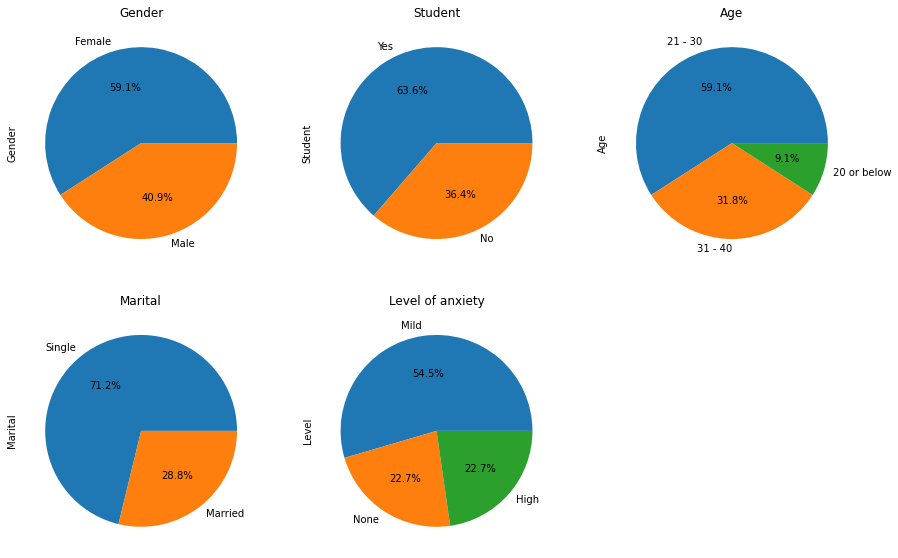

In [6]:
plt.figure(1, figsize=(15,15))
plt.subplot(3,3,1)
plt.title("Gender")
gender_data = anxiety_data['Gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(3,3,2)
plt.title("Student")
student_data = anxiety_data['Student'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(3,3,3)
plt.title("Age")
age_data = anxiety_data['Age'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(3,3,4)
plt.title("Marital")
marital_data = anxiety_data['Marital'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(3,3,5)
plt.title("Level of anxiety")
level_data = anxiety_data['Level'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

#צירפנו את עוגות הנתונים כדי להראות את הפילוח של הנשארים ואת צורת החלוקה שלהם לפי כמות בבחינה. בנוסף גם  הוספנו את החלוקה של רמות החרדה אצל הנשאלים- כבר אפשר לראות שליותר מחצי מהנשאלים יש רמת חרדה בינונית 
#(מפתיע לראות שלחלק ככ גדול מכל הנשאלים מתמודדים עם מצב כזה ועכשיו נרצה להבין אם אפשר לשים דגש על משהו ספציפי יותר שיכול לגרום לחרדה ואולי על ידי זה נדע איך להתמודד עם חרדות בהמשך או אולי אפילו למנוע אותה)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Less than 4 hours per day'),
  Text(1, 0, 'Less than 2 hours per day'),
  Text(2, 0, '4 hours and above per day'),
  Text(3, 0, 'Less than 1 hours per day'),
  Text(4, 0, 'Less than 3 hours per day')])

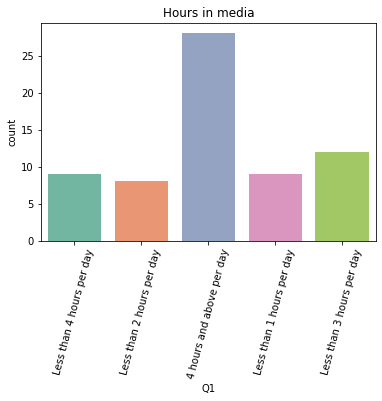

In [7]:
plt.title("Hours in media")
ax = sns.countplot(x="Q1", data=anxiety_data, palette="Set2" )
plt.xticks(rotation = 75)

# חשבנו מיד לקשר את רמות החרדה לזמן הבילוי ברשתות החברתיות ולכן אנחנו מראים קודם את כמות האנשים שמבלה ברשתות חברתיות בכל אחד מהזמנים שניתנו בשאלון

In [8]:
anxiety_data.groupby(['Student','Q1'])[['Total Anxiety']].mean()

# רצינו לבדוק האם קיים הבדל מהותי בין סטודנטים לבין מי שלא אז עשינו גרופביי לפי סטודנטים או לא ומה הם ענו בשאלה 1

Total Anxiety
Student Q1                                      
No      4 hours and above per day      24.166667
        Less than 1 hours per day      19.800000
        Less than 2 hours per day      19.750000
        Less than 3 hours per day      20.000000
        Less than 4 hours per day      19.400000
Yes     4 hours and above per day      21.090909
        Less than 1 hours per day      19.500000
        Less than 2 hours per day      17.750000
        Less than 3 hours per day      22.375000
        Less than 4 hours per day      18.000000

<AxesSubplot:xlabel='Student', ylabel='Total Anxiety'>

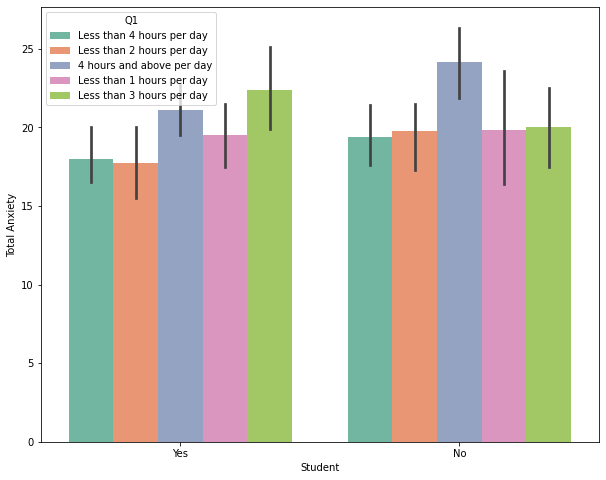

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x="Student", y="Total Anxiety", hue="Q1",  data=anxiety_data, palette="Set2")

# הבנו שבבאר פלוט ניתן לראות יותר בבירור את ההבדלים בין מי שסוטדנט לבין מי שלא וניתן לראות שאצל מי שלא סטודנט מי שמבלה יותר מ4 שעות ברשת החברתית הוא אכן סובל יותר מחרדה חברתית
# לעומת זאת אצל מי שסטודנט אפשר לראות שיותר זמן מול הרשת בחרתית הוא כן משפיע אבל אי אפשר לקחת מפה אמירה שזה מה שגורם בעיקר לחרדה חברתית

In [10]:
student = anxiety_data[anxiety_data['Student'] == 'Yes'].reset_index(drop = True)
#student.tail()
# הבנו שיותר מעניין אותנו להתעסק עם הסטודנטים כי הם גם הרוב של ננשאלים פה בשאלון ולכן פתחנו דאטה פרים חדש שכולל בתוכו רק את מי שסטודנט

Text(0, 0.5, 'Anxiety level')

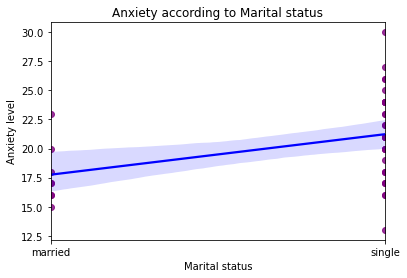

In [11]:
plt.title('Anxiety according to Marital status')
sns.regplot(x = 'Marital_n', y = 'Total Anxiety', data = student, scatter_kws = {'color': 'purple'}, line_kws = {'color': 'blue'})
plt.xlabel('Marital status')
plt.xticks(np.arange(2), ['married', 'single'])
plt.ylabel('Anxiety level')

# אחרי שהחלטנו לבדוק מה קורה בקרב סטודנטים רצינו לבדוק האם יש קשר בין מצב משפחתי לבין רמת חרדה

In [12]:
student.groupby(['Marital','Gender'])[['Total Anxiety']].mean().round(2)
# אחרי שהבנו שיש הבדל ברמת החרדה בין נשואים ללא נשואים רצינו לבדוק מה קורה בתוך אוכלוסיות אלה בין נשים וגברים

Total Anxiety
Marital Gender               
Married Female          18.17
        Male            16.50
Single  Female          21.39
        Male            21.06

Text(0, 0.5, 'Total Anxitey')

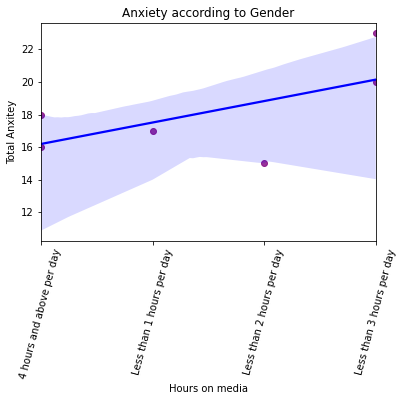

In [13]:
married = student[student['Marital'] == 'Married'].reset_index(drop = True)
married_female = married[married['Gender'] == 'Female'].reset_index(drop = True)
plt.title('Anxiety according to Gender')
sns.regplot(x = 'Q1_n', y = 'Total Anxiety', data = married_female, scatter_kws = {'color': 'purple'}, line_kws = {'color': 'blue'})
plt.xlabel('Hours on media')
plt.xticks(np.arange(4), ['4 hours and above per day','Less than 1 hours per day','Less than 2 hours per day','Less than 3 hours per day'], rotation = 75)
plt.ylabel('Total Anxitey')
#אחרי שזיהינו את הקשרים בין מצב משפחתי מגדר ורמת חרדה רצינו לבדוק אם הקשר נשמר גם בזמן המושקע ברשתות החברתיות

##### תובנה 1
מהגרף הראשון אפשר להבין שאכן סטודנטים נשואים סובלים פחות מחרדה חברתית. 
בגרף השני בדקנו את הקשר בין רמת החרדה של נשים נשואות לזמן שהן מבלות ברשתות החברתיות. ניתן לראות שאכן בין 0 ל-3 שעות של בילוי ברשתות החברתיות רמת החרדה עולה.
באופן מפתיע עולה מכאן שדווקא בילוי של מעל 4 שעות ברשתות החברתיות מוריד את רמת החרדה בקרב נשים נשואות.
מכאן אפשר לבדוק את האפשרות שדווקא אצל נשים נשואות - שלרוב פחות פנויות להשקעה באינטרקציה חברתית כזאת או אחרת -המעורבות החברתית דרך הרשתות דווקא יכולה להועיל בהפחתת רמת החרדה.

Text(0, 0.5, 'Anxiety level')

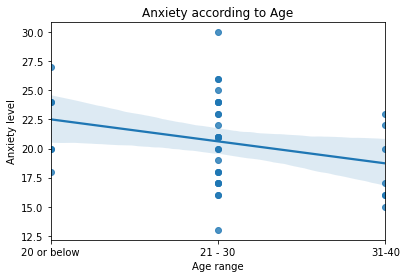

In [14]:
plt.title('Anxiety according to Age')
sns.regplot(x = 'Age_n', y = 'Total Anxiety', data = student)
plt.xlabel('Age range')
plt.xticks(np.arange(3), ['20 or below', '21 - 30','31-40'])
plt.ylabel('Anxiety level')

# תחום נוסף שרצינו לבדוק הוא האם יש השפעה של הגיל על רמת החרדה ולכן בחרנו בגרף

In [15]:
student.groupby(['Age','Gender'])[['Total Anxiety']].mean().round(2)
# אחרי שהבנו שיש קשר בין גיל לרמת חרדה רצינו לבדוק בכל גיל את ההבדלים בין נשים וגברים 

Total Anxiety
Age         Gender               
20 or below Female          23.67
            Male            20.67
21 - 30     Female          20.53
            Male            21.08
31 - 40     Female          18.50
            Male            18.33

##### תובנה 2
מהגרף רואים שבאמת כמו שהיינו חושבים ככל שהגיל מתקדם יותר כך רמת החרדה החברתית יורדת.
התובנה המעניינית שעולה מהגרופביי היא שאמנם ככל שמתקדמים בגיל ויורדת רמת החרדה יורד גם ההבדל בין גברים לנשים ברמת החרדה

In [16]:
single = student[student['Marital'] == 'Single'].reset_index(drop = True)

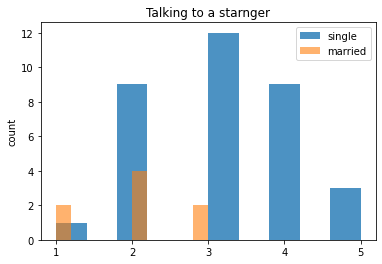

In [17]:
plt.title('Talking to a starnger')
plt.hist(single['Q4'], alpha = 0.8, label = 'single')
plt.hist(married['Q4'], alpha = 0.6, label = 'married')
plt.xticks([1,2,3,4,5])
plt.ylabel('count')
plt.legend(loc = 'upper right')

Text(0.5, 1.0, 'married')

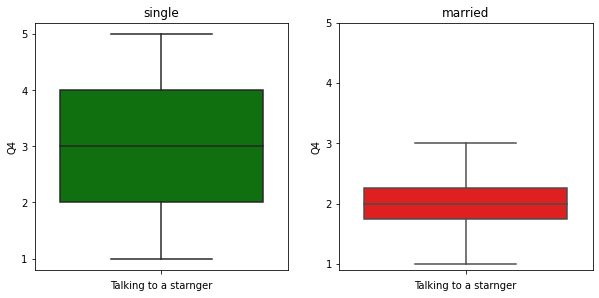

In [18]:
plt.figure(1, figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y='Q4',data = single,color='green')
plt.yticks([1,2,3,4,5])
plt.xlabel('Talking to a starnger')
plt.title('single')
plt.subplot(2,2,2)
sns.boxplot(y='Q4',data = married,color='red')
plt.yticks([1,2,3,4,5])
plt.xlabel('Talking to a starnger')
plt.title('married')


##### תובנה 3
לסטודנטים רווקים יותר מפריע ומלחיץ לדבר פנים אל פנים עם אדם שהם לא מכירים מאשר לסטודנטים נשואים .

Text(0.5, 1.0, 'married')

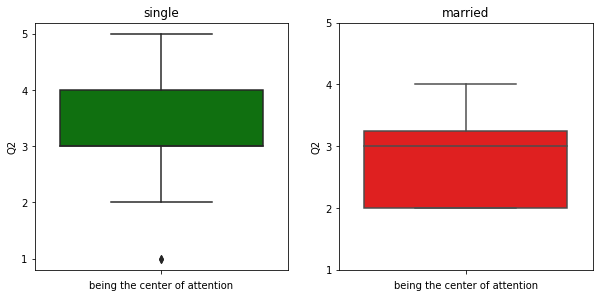

In [19]:

plt.figure(1, figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y='Q2',data = single,color='green')
plt.yticks([1,2,3,4,5])
plt.xlabel('being the center of attention')
plt.title('single')
plt.subplot(2,2,2)
sns.boxplot(y='Q2',data = married,color='red')
plt.yticks([1,2,3,4,5])
plt.xlabel('being the center of attention')
plt.title('married')


##### תובנה 4
אמנם ביחס לשאלה החציון בין נשואים לרווקים הוא שווה.
אבל אם בודקים היכן נמצא הרבעון אצל כל אוכלוסיה ניתן לראות שאצל הנשואים הרבעון נמצא בחלק התחתון משמע שהם מרגישים יותר בנוח כאשר הם נמצאים במרכז תשומת הלב.
ולעומת  זאת אצל הרווקים הרבעון נמצא בחלק העליון מה שאומר שהם מרגישים פחות בנוח כאשר הם נמצאים במרכז תשומת הלב.